In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Insurancefraud.xlsx', sheet_name='Fraud')

In [3]:
df

,months_as_customer,age,policy_number,policy_initial_date,policy_state,limit/person,limit_accident,policy_deductable,policy_annual_premium,umbrella_limit,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250,500,1000,1406.91,0,...,YES,1,2,YES,71610,6510,13020,52080,2004,1
1,228,42,342868,2006-06-27,IN,250,500,2000,1197.22,5000000,...,NO,0,0,NO,5070,780,780,3510,2007,1
2,134,29,687698,2000-09-06,OH,100,300,2000,1413.14,5000000,...,NO,2,3,NO,34650,7700,3850,23100,2007,0
3,256,41,227811,1990-05-25,IL,250,500,2000,1415.74,6000000,...,NO,1,2,NO,63400,6340,6340,50720,2014,1
4,228,44,367455,2014-06-06,IL,500,1000,1000,1583.91,6000000,...,NO,0,1,NO,6500,1300,650,4550,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500,1000,1000,1310.80,0,...,YES,0,1,NO,87200,17440,8720,61040,2006,0
996,285,41,186934,2014-01-05,IL,100,300,1000,1436.79,0,...,YES,2,3,NO,108480,18080,18080,72320,2015,0
997,130,34,918516,2003-02-17,OH,250,500,500,1383.49,3000000,...,NO,2,3,YES,67500,7500,7500,52500,1996,0
998,458,62,533940,2011-11-18,IL,500,1000,2000,1356.92,5000000,...,NO,0,1,YES,46980,5220,5220,36540,1998,0


Este conjunto de datos parece contener información relacionada con reclamaciones de seguros, con columnas que incluyen detalles sobre los clientes (como months_as_customer, age, policy_number), detalles de la póliza de seguro (como policy_state, limit/person, policy_annual_premium), y detalles específicos de las reclamaciones (como total_claim_amount, injury_claim, vehicle_claim) entre otros. La columna fraud_reported indica si se reportó fraude en la reclamación, donde 1 representa fraude y 0 representa no fraude.

In [4]:
df.describe()

,months_as_customer,age,policy_number,limit/person,limit_accident,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip_code,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,272.650000,580.200000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,...,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,161.603196,287.420547,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,...,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,100.000000,300.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,100.000000,300.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,250.000000,500.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,500.000000,1000.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,...,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,500.000000,1000.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,...,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


In [5]:
sum_row = df['fraud_reported'].sum()
sum_row

247

In [6]:
np.random.seed(12345)
df['Train']=[1 if np.random.uniform()<0.5 else 0 for _ in range(len(df))]
df.head()

,months_as_customer,age,policy_number,policy_initial_date,policy_state,limit/person,limit_accident,policy_deductable,policy_annual_premium,umbrella_limit,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Train
0,328,48,521585,2014-10-17,OH,250,500,1000,1406.91,0,...,1,2,YES,71610,6510,13020,52080,2004,1,0
1,228,42,342868,2006-06-27,IN,250,500,2000,1197.22,5000000,...,0,0,NO,5070,780,780,3510,2007,1,1
2,134,29,687698,2000-09-06,OH,100,300,2000,1413.14,5000000,...,2,3,NO,34650,7700,3850,23100,2007,0,1
3,256,41,227811,1990-05-25,IL,250,500,2000,1415.74,6000000,...,1,2,NO,63400,6340,6340,50720,2014,1,1
4,228,44,367455,2014-06-06,IL,500,1000,1000,1583.91,6000000,...,0,1,NO,6500,1300,650,4550,2009,0,0


Este fragmento de código agrega una nueva columna llamada Train al DataFrame df. La columna se llena con valores 1 y 0, determinados de forma aleatoria. La intención detrás de esto suele ser dividir el conjunto de datos en dos subconjuntos: uno para entrenamiento y otro para pruebas/validación, una práctica común en el aprendizaje automático y análisis de datos para evaluar la generalización de los modelos.

La columna Train ahora puede ser utilizada como un indicador para dividir el conjunto de datos. Por ejemplo, puedes usar las filas donde Train es 1 para entrenar un modelo, y las filas donde Train es 0 para validar el modelo o para pruebas.

La columna Train se ha añadido correctamente al DataFrame. Ahora cada fila tiene asignado un valor 0 o 1 en esta columna, determinado de forma aleatoria. Esto indica si cada fila se utilizará para entrenamiento (1) o no (0), permitiendo así una división simple del conjunto de datos para propósitos de entrenamiento y validación o pruebas.

In [7]:
x=df.drop(columns=['fraud_reported', 'Train'])
y=df['fraud_reported']

x = df.drop(columns=['fraud_reported', 'Train']): Esta línea crea un nuevo DataFrame x que es una copia de df pero sin las columnas fraud_reported y Train. La función drop elimina las columnas especificadas del DataFrame. Esto se hace porque fraud_reported es lo que usualmente queremos predecir (la variable objetivo o dependiente), y Train es una columna artificial que hemos añadido para dividir el conjunto de datos, por lo tanto, ninguna de las dos debe incluirse en las variables de entrada para el modelo.

y = df['fraud_reported']: Esta línea extrae la columna fraud_reported de df y la asigna a y. Esta será nuestra variable objetivo, que contiene los valores que intentaremos predecir con nuestro modelo. En el contexto de este conjunto de datos, y contiene información sobre si se reportó fraude (1) o no (0) en cada caso.
    

En resumen:

x contiene los predictores o variables independientes (todas las columnas excepto fraud_reported y Train), que son los datos que usaremos para predecir los valores de y.
y contiene la variable objetivo o dependiente (fraud_reported), que es el resultado que esperamos predecir basándonos en los datos en x.

In [8]:
x_train = x[df['Train'] == 1]
#It selects the rows on x, where the conditiomn is true
x_test = x[df['Train'] == 0]
#It selects the rows on x, where the conditiomn is true
y_train = y[df['Train'] == 1]
#It selects the rows on y, where the conditiomn is true
y_test = y[df['Train'] == 0]
#It selects the rows on y, where the conditiomn is true

Este bloque de código divide los datos en dos conjuntos: uno para entrenar el modelo (x_train y y_train) y otro para evaluar su rendimiento (x_test y y_test), basándose en la columna Train que fue añadida previamente al DataFrame df. Esta es una práctica común en el aprendizaje automático para evaluar cómo el modelo generaliza a nuevos datos que no ha visto durante el entrenamiento.

In [9]:
x_train.head()

,months_as_customer,age,policy_number,policy_initial_date,policy_state,limit/person,limit_accident,policy_deductable,policy_annual_premium,umbrella_limit,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
1,228,42,342868,2006-06-27,IN,250,500,2000,1197.22,5000000,...,1,NO,0,0,NO,5070,780,780,3510,2007
2,134,29,687698,2000-09-06,OH,100,300,2000,1413.14,5000000,...,3,NO,2,3,NO,34650,7700,3850,23100,2007
3,256,41,227811,1990-05-25,IL,250,500,2000,1415.74,6000000,...,1,NO,1,2,NO,63400,6340,6340,50720,2014
12,60,23,842643,1997-11-20,OH,500,1000,500,1215.36,3000000,...,1,YES,1,0,NO,56520,4710,9420,42390,2000
13,121,34,626808,2012-10-26,OH,100,300,1000,936.61,0,...,1,NO,1,1,NO,7280,1120,1120,5040,2010


Esto es útil para un modelo de aprendizaje automático que solo puede manejar datos numéricos, o cuando se desea realizar análisis estadístico que solo aplica a datos numéricos.

In [10]:
numeric_df = x_train.select_dtypes(include=['number'])
numeric_test_df = x_test.select_dtypes(include=['number'])
numeric_df.head()

,months_as_customer,age,policy_number,limit/person,limit_accident,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip_code,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
1,228,42,342868,250,500,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,100,300,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,250,500,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
12,60,23,842643,500,1000,500,1215.36,3000000,432220,0,0,9,1,1,0,56520,4710,9420,42390,2000
13,121,34,626808,100,300,1000,936.61,0,464652,52800,-32800,5,1,1,1,7280,1120,1120,5040,2010


In [11]:
categorical_df = x_train.select_dtypes(include=['object'])
categorical_test_df = x_test.select_dtypes(include=['object'])
categorical_df

,policy_state,insured_sex,insured_education_level,insured_occupation,incident_type,incident_severity,authorities_contacted,incident_state,property_damage,police_report_available
1,IN,MALE,MD,machine-op-inspct,Vehicle Theft,Minor Damage,Police,VA,NO,NO
2,OH,FEMALE,PhD,sales,Multi-vehicle Collision,Minor Damage,Police,NY,NO,NO
3,IL,FEMALE,PhD,armed-forces,Single Vehicle Collision,Major Damage,Police,OH,NO,NO
12,OH,MALE,MD,protective-serv,Single Vehicle Collision,Total Loss,Ambulance,SC,YES,NO
13,OH,FEMALE,MD,armed-forces,Parked Car,Minor Damage,None,SC,NO,NO
...,...,...,...,...,...,...,...,...,...,...
991,OH,MALE,MD,other-service,Single Vehicle Collision,Total Loss,Other,WV,NO,NO
992,IN,MALE,MD,exec-managerial,Multi-vehicle Collision,Major Damage,Fire,OH,YES,YES
995,OH,FEMALE,Masters,craft-repair,Single Vehicle Collision,Minor Damage,Fire,NC,YES,NO
998,IL,MALE,Associate,handlers-cleaners,Single Vehicle Collision,Major Damage,Other,NY,NO,YES


De forma similar a lo hecho con las variables numéricas, aquí seleccionas solo las columnas categóricas de x_train y x_test, creando categorical_df y categorical_test_df, respectivamente. 

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [13]:
scaler = StandardScaler()
scaler.fit(numeric_df)

# Transform numeric features
X_train_numeric_processed = scaler.transform(numeric_df)
X_test_numeric_processed = scaler.transform(numeric_test_df)

Estamos utilizando StandardScaler de sklearn.preprocessing para estandarizar las características numéricas de tu conjunto de datos. 

Con fit, calculas la media y la desviación estándar de cada característica numérica en el conjunto de datos de entrenamiento (numeric_df). Esta información se utiliza para transformar los datos (tanto de entrenamiento como de prueba) de manera que cada característica se estandarice. Es importante ajustar el escalador solo a los datos de entrenamiento para evitar el "data leakage" (fuga de información) del conjunto de prueba.

Nos sirve la transformación para regresiones logísticas

In [14]:
encoder= OneHotEncoder()
encoder.fit(categorical_df)

X_train_categorical_processed = encoder.transform(categorical_df).toarray()
X_test_categorical_processed = encoder.transform(categorical_test_df).toarray()


El método fit calcula los parámetros necesarios para la estandarización (media y desviación estándar) para cada característica. Este ajuste se hace solo con los datos de entrenamiento para evitar el sesgo en el modelo.

In [15]:
X_train_processed = np.concatenate((X_train_numeric_processed, X_train_categorical_processed), axis=1)
X_test_processed = np.concatenate((X_test_numeric_processed, X_test_categorical_processed), axis=1)

In [16]:
X_test_processed

array([[ 1.09434431,  1.00363048, -0.05836942, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.22230055,  0.57166058, -0.64828307, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.4664728 ,  0.0316982 , -1.65435125, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.53637752, -0.94023409,  0.55363201, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.71936549,  0.24768315, -1.33920502, ...,  1.        ,
         1.        ,  0.        ],
       [-0.63230234, -0.50826418,  1.46083522, ...,  0.        ,
         0.        ,  1.        ]])

In [17]:

X_test_processed = pd.DataFrame(X_test_processed)
X_test_processed

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,1.094344,1.003630,-0.058369,-0.152141,-0.293080,-0.232773,0.674134,-0.467292,-0.492574,0.981601,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.222301,0.571661,-0.648283,1.369268,1.418284,-0.232773,1.400945,2.227365,1.528676,1.437230,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.466473,0.031698,-1.654351,-0.152141,-0.293080,-0.232773,0.444962,-0.467292,-0.320275,-0.930605,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.571259,-0.508264,-0.470222,-0.152141,-0.293080,-0.232773,0.372076,-0.467292,-0.833927,-0.930605,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.327087,-0.184287,-0.412624,-1.064986,-0.977625,-0.232773,-0.434069,-0.467292,1.423667,-0.930605,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.806570,0.787646,0.208338,-1.064986,-0.977625,-1.048304,1.766281,-0.467292,-0.313411,-0.930605,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
502,-0.684625,-1.156219,0.527162,-0.152141,-0.293080,-0.232773,-0.031202,-0.467292,-0.808049,-0.930605,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
503,-0.536378,-0.940234,0.553632,1.369268,1.418284,-0.232773,0.428291,-0.467292,-0.988428,-0.930605,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
504,0.719365,0.247683,-1.339205,-1.064986,-0.977625,-0.232773,0.796829,-0.467292,1.493319,1.613024,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [18]:
y_train.head()

1     1
2     0
3     1
12    0
13    0
Name: fraud_reported, dtype: int64

In [19]:
total_samples = len(y_train)
total_samples

494

In [20]:
fraud_sample = sum(y_train)
fraud_sample

119

In [21]:
non_fraud_sample = total_samples - fraud_sample
non_fraud_sample

375

In [22]:
sample_fraud = fraud_sample/total_samples
sample_fraud

0.2408906882591093

In [23]:
0.8/(1-sample_fraud)

1.0538666666666667

In [24]:
desired_probability = 0.2
weight_fraud = desired_probability/sample_fraud
weight_fraud

0.8302521008403362

Estamos combinando (concatenando) las características numéricas procesadas y las características categóricas procesadas para tus conjuntos de datos de entrenamiento y prueba. Luego, conviertes el resultado en un DataFrame de pandas. Este es un paso importante en la preparación de los datos para el modelado, ya que reúnes todas las características transformadas en un solo conjunto de datos. Veamos cada línea en detalle

## Linear Regression

In [25]:
from sklearn import linear_model
ols=linear_model.LinearRegression()
ols.fit(X_train_processed, y_train)

LinearRegression()

In [26]:
ols.fit(X_train_processed, y_train).coef_

array([ 7.04844884e-02, -5.08938874e-02, -2.24828308e-03,  4.13384293e-01,
       -4.06631814e-01,  2.04708734e-02,  7.01990619e-03,  3.39198209e-02,
       -3.24489792e-04, -3.67238628e-03, -8.85373765e-03,  5.66054656e-03,
        3.51116335e-02,  1.72325463e-02,  1.50887269e-02, -3.05572723e+12,
        5.78096405e+11,  5.60659133e+11,  2.19229353e+12,  9.57849586e-03,
        1.07141885e+12,  1.07141885e+12,  1.07141885e+12,  5.56481502e+11,
        5.56481502e+11,  1.83605089e+11,  1.83605089e+11,  1.83605089e+11,
        1.83605089e+11,  1.83605089e+11,  1.83605089e+11,  1.83605089e+11,
        2.50298447e+10,  2.50298447e+10,  2.50298447e+10,  2.50298447e+10,
        2.50298447e+10,  2.50298447e+10,  2.50298447e+10,  2.50298447e+10,
        2.50298447e+10,  2.50298447e+10,  2.50298447e+10,  2.50298447e+10,
        2.50298447e+10,  2.50298447e+10, -4.58714175e+11, -4.58714175e+11,
       -4.58714175e+11, -4.58714175e+11,  6.09488169e+11,  6.09488169e+11,
        6.09488169e+11,  

In [27]:
ols_predictions = ols.predict(X_test_processed).round(0)
ols_predictions

array([ 1., -0.,  1.,  0., -0., -0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0.,  0.,  1., -0.,  0., -0.,  1.,  1.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  1.,  0.,  0.,  0., -0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0., -0.,  0.,  1., -0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0., -0.,  0.,  0.,
       -0.,  0.,  0., -0.,  0.,  0., -0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  1., -0.,  0.,  1.,  1.,  1.,  0.,  0., -0.,  0

In [28]:
from sklearn.metrics import mean_squared_error
mse_ols=mean_squared_error(y_test, ols_predictions)
mse_ols

0.21146245059288538

In [29]:
ols_ct=pd.crosstab(y_test, ols_predictions)
ols_ct

col_0,-0.0,1.0
fraud_reported,,
0,342,36
1,71,57


In [30]:
#Number of False Positives: The number of instances where the model incorrectly predicts fraud (positive class) when the true outcome is not fraud (negative class).

#Number of Actual Negatives: The total number of instances where the true outcome is not fraud (negative class).

#Type I Error Rate= 
# Number of False Positives/Number of Actual Negatives

type1_ols=ols_ct.iloc[0,1]/(ols_ct.iloc[0,0]+ols_ct.iloc[0,1])
type1_ols


0.09523809523809523

In [31]:
#Number of False negatives: The number of instances where the model incorrectly predicts not fraud (negative class)

#Number of actual Positives: Total number of instances where true outcome is fraud

#Type II Error Rate= 
# Number of False Negatives/Number of Actual Positives

type2_ols=ols_ct.iloc[1,0]/(ols_ct.iloc[1,1]+ols_ct.iloc[1,0])
type2_ols


0.5546875

In [32]:
#Accuracy of fraud detecting
#Correctly predicts fraud / Total fraud
fraud_acc_ols = ols_ct.iloc[1,1] / (ols_ct.iloc[1,1]+ols_ct.iloc[1,0])
fraud_acc_ols

0.4453125

In [33]:
#Accuracy of not fraud detecting
#Correctly predicts not fraud / Total not fraud
nfraud_acc_ols = ols_ct.iloc[0,0] / (ols_ct.iloc[0,1]+ols_ct.iloc[0,0])
nfraud_acc_ols

0.9047619047619048

In [34]:
#R_pseudo
r_ols=(ols_ct.iloc[0,0]+ols_ct.iloc[1,1])/(ols_ct.iloc[0,0]+ols_ct.iloc[0,1]+ols_ct.iloc[1,0]+ols_ct.iloc[1,1])
r_ols

0.7885375494071146

# Ridge

In [35]:
from sklearn import linear_model
ridge=linear_model.Ridge()
ridge.fit(X_train_processed, y_train)

Ridge()

In [36]:
ridge.fit(X_train_processed, y_train).coef_

array([ 6.88706212e-02, -5.53796235e-02, -7.17203541e-03,  1.39858629e-01,
       -1.34250784e-01,  2.22202052e-02,  7.88044335e-03,  3.21144866e-02,
        8.58024396e-03, -2.86995985e-03, -1.38569305e-02, -2.58918415e-04,
       -4.77235796e-02,  1.89619415e-02,  1.64390493e-02,  1.79466490e-02,
       -1.37788241e-02, -3.51194730e-02,  3.76298178e-02,  1.42622535e-02,
       -3.35082184e-03, -2.19141159e-02,  2.52649377e-02,  1.52088048e-03,
       -1.52088048e-03, -9.49953153e-02,  1.01862898e-01, -2.84722588e-02,
        3.52247676e-02,  3.33303965e-02, -5.11722682e-02,  4.22178053e-03,
       -6.57546404e-02,  6.14910775e-02,  2.49889241e-03,  1.38018455e-01,
        2.44796208e-02, -8.47139945e-02,  1.08118826e-01, -8.95656130e-02,
        3.64567441e-03, -3.51511192e-02, -2.42402809e-02, -2.62080337e-03,
       -3.27669114e-02, -3.43918368e-03, -2.94752789e-02,  8.09923388e-02,
       -8.50064740e-02,  3.34894141e-02,  3.36818390e-01, -9.34731956e-02,
       -9.67213670e-02, -

In [37]:
ridge_predictions = ridge.predict(X_test_processed).round(0)
ridge_predictions

array([ 1., -0.,  1., -0., -0., -0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -0.,  1., -0.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  1.,  0.,  1.,  0., -0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0., -0.,  0.,
        0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0., -0.,  0.,  0.,
       -0.,  0.,  0., -0.,  0.,  0., -0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0., -0.,  0

In [38]:
mse_ridge=mean_squared_error(y_test, ridge_predictions)
mse_ridge

0.19960474308300397

In [39]:
ridge_ct=pd.crosstab(y_test, ridge_predictions)
ridge_ct

col_0,-0.0,1.0
fraud_reported,,
0,342,36
1,65,63


In [40]:
#Number of False Positives: The number of instances where the model incorrectly predicts fraud (positive class) when the true outcome is not fraud (negative class).

#Number of Actual Negatives: The total number of instances where the true outcome is not fraud (negative class).

#Type I Error Rate= 
# Number of False Positives/Number of Actual Negatives

type1_ridge=ridge_ct.iloc[0,1]/(ridge_ct.iloc[0,0]+ridge_ct.iloc[0,1])
type1_ridge


0.09523809523809523

In [41]:
#Number of False negatives: The number of instances where the model incorrectly predicts not fraud (negative class)

#Number of actual Positives: Total number of instances where true outcome is fraud

#Type II Error Rate= 
# Number of False Negatives/Number of Actual Positives

type2_ridge=ridge_ct.iloc[1,0]/(ridge_ct.iloc[1,1]+ridge_ct.iloc[1,0])
type2_ridge

0.5078125

In [42]:
#Accuracy of fraud detecting
#Correctly predicts fraud / Total fraud
fraud_acc_ridge = ridge_ct.iloc[1,1] / (ridge_ct.iloc[1,1]+ridge_ct.iloc[1,0])
fraud_acc_ridge

0.4921875

In [43]:
#Accuracy of not fraud detecting
#Correctly predicts not fraud / Total not fraud
nfraud_acc_ridge = ridge_ct.iloc[0,0] / (ridge_ct.iloc[0,1]+ridge_ct.iloc[0,0])
nfraud_acc_ridge

0.9047619047619048

In [44]:
#R_pseudo
r_ridge=(ridge_ct.iloc[0,0]+ridge_ct.iloc[1,1])/(ridge_ct.iloc[0,0]+ridge_ct.iloc[0,1]+ridge_ct.iloc[1,0]+ridge_ct.iloc[1,1])
r_ridge

0.8003952569169961

## Logit

In [45]:
from sklearn import linear_model
logit=linear_model.LogisticRegression()
logit.fit(X_train_processed, y_train)

LogisticRegression()

In [46]:
logit.fit(X_train_processed, y_train).coef_

array([[ 4.47606596e-01, -3.46809907e-01, -5.99580770e-02,
         3.73247533e-01, -3.30028846e-01,  1.74364907e-01,
         3.81879811e-02,  2.34080582e-01,  5.91988603e-02,
        -3.55173419e-02, -8.61852067e-02, -1.00628575e-02,
        -1.97146281e-01,  1.50757506e-01,  1.22366258e-01,
         9.31170227e-02, -9.50837526e-02, -2.47885849e-01,
         2.18258758e-01,  9.79727526e-02, -5.90375835e-02,
        -1.19088001e-01,  1.79079344e-01,  6.02519788e-04,
         3.51239849e-04, -7.12171109e-01,  6.05169972e-01,
        -1.27389001e-01,  2.53628855e-01,  2.69669696e-01,
        -2.75945653e-01, -1.20090009e-02, -5.54710698e-01,
         4.79217531e-01, -1.00556756e-02,  7.38935351e-01,
         7.38799568e-02, -4.07268391e-01,  7.13166289e-01,
        -6.58792187e-01,  2.23337900e-02, -1.70206052e-01,
        -1.01835977e-01,  2.41781522e-02, -1.49587808e-01,
         1.69947836e-03, -1.05676660e-01,  2.93499487e-01,
        -2.16151548e-01,  2.92824804e-02,  1.75023574e+0

In [47]:
logit_predictions = logit.predict(X_test_processed)
logit_predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [48]:
mse_logit=mean_squared_error(y_test, logit_predictions)
mse_logit

0.2134387351778656

In [49]:
logit_ct=pd.crosstab(y_test, logit_predictions)
logit_ct

col_0,0,1
fraud_reported,,
0,341,37
1,71,57


In [50]:
#Model incorrectly predicts fraud
logit_ct.iloc[0,1]

37

In [51]:
#Model correctly predicts fraud
logit_ct.iloc[1,1]

57

In [52]:
#Model incorrectly predicts not fraud
logit_ct.iloc[1,0]

71

In [53]:
#Model correctly predicts not fraud
logit_ct.iloc[0,0]

341

In [54]:
#Number of False Positives: Model incorrectly predicts fraud (positive class) when the true outcome is not fraud (negative class).

#Number of Actual Negatives: The total true not fraud (negative class).

#Type I Error Rate= 
# Number of False Positives/Number of Actual Negatives
# Model incorrecly predicts fraud / Total not fraud

type1_logit=logit_ct.iloc[0,1]/(logit_ct.iloc[0,0]+logit_ct.iloc[0,1])
type1_logit

0.09788359788359788

In [55]:
#Number of False negatives: The number of instances where the model incorrectly predicts not fraud (negative class)

#Number of actual Positives: Total number of instances where true outcome is fraud

#Type II Error Rate= 
# Number of False Negatives/Number of Actual Positives
# Model incorrecly predicts Not fraud / Total fraud

type2_logit=logit_ct.iloc[1,0]/(logit_ct.iloc[1,1]+logit_ct.iloc[1,0])
type2_logit

0.5546875

In [56]:
#Accuracy of fraud detecting
#Correctly predicts fraud / Total fraud
fraud_acc_logit = logit_ct.iloc[1,1] / (logit_ct.iloc[1,1]+logit_ct.iloc[1,0])
fraud_acc_logit

0.4453125

In [57]:
#Accuracy of not fraud detecting
#Correctly predicts not fraud / Total not fraud
nfraud_acc_logit = logit_ct.iloc[0,0] / (logit_ct.iloc[0,1]+logit_ct.iloc[0,0])
nfraud_acc_logit

0.9021164021164021

In [58]:
#R_pseudo
r_logit=(logit_ct.iloc[0,0]+logit_ct.iloc[1,1])/(logit_ct.iloc[0,0]+logit_ct.iloc[0,1]+logit_ct.iloc[1,0]+logit_ct.iloc[1,1])
r_logit

0.7865612648221344

## Lasso Logit

In [59]:
from sklearn import linear_model
lasso_logit=linear_model.LogisticRegression(penalty='l1', solver='liblinear' )
lasso_logit.fit(X_train_processed, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [60]:
lasso_logit.fit(X_train_processed, y_train).coef_

array([[ 0.29239785, -0.19015861, -0.02710468,  0.02917521,  0.        ,
         0.16720366,  0.01507036,  0.23688327,  0.05573645, -0.02124459,
        -0.0720296 ,  0.        , -0.15190913,  0.12876624,  0.09338855,
         0.        , -0.06805997, -0.18004986,  0.15358562,  0.07456155,
        -0.15121458, -0.16889272,  0.        ,  0.        ,  0.        ,
        -0.76900884,  0.36349893, -0.15815474,  0.04553902,  0.        ,
        -0.33018504, -0.00515039, -0.38392516,  0.36851936,  0.        ,
         0.74011154,  0.        , -0.23361906,  0.62315139, -0.49164996,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.23912603,  0.        ,  0.        ,  0.        ,  0.06929936,
        -0.11876291, -1.0939438 ,  0.        , -0.208867  ,  0.07755109,
        -0.46099384,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.08854042, -0.3293645 ,  0.        ,  0. 

In [61]:
lasso_logit_predictions = lasso_logit.predict(X_test_processed)
lasso_logit_predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [62]:
mse_lasso_logit=mean_squared_error(y_test, lasso_logit_predictions)
mse_lasso_logit

0.20948616600790515

In [63]:
lasso_logit_ct=pd.crosstab(y_test, lasso_logit_predictions)
lasso_logit_ct

col_0,0,1
fraud_reported,,
0,341,37
1,69,59


In [64]:
#Number of False Positives: The number of instances where the model incorrectly predicts default (positive class) when the true outcome is not default (negative class).

#Number of Actual Negatives: The total number of instances where the true outcome is not default (negative class).

#Type I Error Rate= 
# Number of False Positives/Number of Actual Negatives

type1_lasso_logit=lasso_logit_ct.iloc[0,1]/(lasso_logit_ct.iloc[0,0]+lasso_logit_ct.iloc[0,1])
type1_lasso_logit

0.09788359788359788

In [65]:
#Number of False negatives: The number of instances where the model incorrectly predicts not fraud (negative class)

#Number of actual Positives: Total number of instances where true outcome is fraud

#Type II Error Rate= 
# Number of False Negatives/Number of Actual Positives

type2_lasso_logit=lasso_logit_ct.iloc[1,0]/(lasso_logit_ct.iloc[1,1]+lasso_logit_ct.iloc[1,0])
type2_lasso_logit

0.5390625

In [66]:
#Accuracy of fraud detecting
#Correctly predicts fraud / Total fraud
fraud_acc_lasso_logit = lasso_logit_ct.iloc[1,1] / (lasso_logit_ct.iloc[1,1]+lasso_logit_ct.iloc[1,0])
fraud_acc_lasso_logit

0.4609375

In [67]:
#Accuracy of not fraud detecting
#Correctly predicts not fraud / Total not fraud
nfraud_acc_lasso_logit = lasso_logit_ct.iloc[0,0] / (lasso_logit_ct.iloc[0,1]+lasso_logit_ct.iloc[0,0])
nfraud_acc_lasso_logit 

0.9021164021164021

In [68]:
#R_pseudo
r_lasso_logit=(lasso_logit_ct.iloc[0,0]+lasso_logit_ct.iloc[1,1])/(lasso_logit_ct.iloc[0,0]+lasso_logit_ct.iloc[0,1]+lasso_logit_ct.iloc[1,0]+lasso_logit_ct.iloc[1,1])
r_lasso_logit

0.7905138339920948

## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = int(np.sqrt(X_train_processed.shape[1]))

# Initialize Random Forest classifier with the calculated number of estimators
rf = RandomForestClassifier(n_estimators=n_estimators )

# Train the classifier
rf.fit(X_train_processed, y_train)

RandomForestClassifier(n_estimators=8)

In [70]:
rf_predictions=rf.predict(X_test_processed)
rf_predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [71]:
mse_rf=mean_squared_error(y_test, rf_predictions)
mse_rf

0.22924901185770752

In [72]:
rf_ct=pd.crosstab(y_test, rf_predictions)
rf_ct

col_0,0,1
fraud_reported,,
0,362,16
1,100,28


In [73]:
type1_rf=rf_ct.iloc[0,1]/(rf_ct.iloc[0,0]+rf_ct.iloc[0,1])
type1_rf

0.042328042328042326

In [74]:
type2_rf=rf_ct.iloc[1,0]/(rf_ct.iloc[1,1]+rf_ct.iloc[1,0])
type2_rf

0.78125

In [75]:
#Accuracy of fraud detecting
#Correctly predicts fraud / Total fraud
fraud_acc_rf = rf_ct.iloc[1,1] / (rf_ct.iloc[1,1]+rf_ct.iloc[1,0])
fraud_acc_rf

0.21875

In [76]:
#Accuracy of not fraud detecting
#Correctly predicts not fraud / Total not fraud
nfraud_acc_rf = rf_ct.iloc[0,0] / (rf_ct.iloc[0,1]+rf_ct.iloc[0,0])
nfraud_acc_rf

0.9576719576719577

In [77]:
#R_pseudo
r_rf=(rf_ct.iloc[0,0]+rf_ct.iloc[1,1])/(rf_ct.iloc[0,0]+rf_ct.iloc[0,1]+rf_ct.iloc[1,0]+rf_ct.iloc[1,1])
r_rf

0.7707509881422925

# Summary results

In [78]:
test_data={'Fraud': y_test,
    'OLS': ols_predictions,
    'Ridge': ridge_predictions,
    'Logit': logit_predictions,
    'Lasso_Logit': lasso_logit_predictions,
    'Random Forest': rf_predictions
          }


test_df = pd.DataFrame(test_data)
test_df

,Fraud,OLS,Ridge,Logit,Lasso_Logit,Random Forest
0,1,1.0,1.0,1,1,1
4,0,-0.0,-0.0,0,0,0
5,1,1.0,1.0,1,1,0
6,0,0.0,-0.0,0,0,0
7,0,-0.0,-0.0,0,0,0
...,...,...,...,...,...,...
988,0,0.0,0.0,0,0,0
993,0,0.0,0.0,0,0,0
994,0,0.0,0.0,0,0,0
996,0,1.0,1.0,1,1,1


El MSE es una medida del promedio de los cuadrados de los errores, es decir, la diferencia promedio al cuadrado entre los valores observados y los valores predichos por el modelo. Cuanto menor sea el MSE, mejor será el modelo en términos de precisión.

El Pseudo R-cuadrado es una medida que intenta proporcionar una interpretación similar al R-cuadrado para modelos que no son de mínimos cuadrados ordinarios, como la regresión logística. No se interpreta exactamente de la misma manera que el R-cuadrado en la regresión lineal, pero un valor más alto generalmente indica un mejor ajuste del modelo.

Error de Tipo 1 (Falsos Positivos): Un alto error de Tipo 1 significa que el modelo está identificando incorrectamente transacciones legítimas como fraudulentas. Esto puede ser costoso y molesto para los clientes legítimos y puede dañar la relación con los clientes y la reputación de la compañía de seguros. Predice que hay fraude, cuando no hay fraude.

El error de Tipo 2 se refiere a la tasa de falsos negativos, es decir, cuántas veces un modelo no logra detectar un evento (como el fraude) cuando en realidad sí ocurrió. Esto puede resultar en pérdidas financieras significativas para la compañía de seguros si los reclamos fraudulentos no se detectan. Predice que no hay fraude, cuando hay fraude

In [79]:
mse_values=[mse_ols, mse_ridge, mse_logit, mse_lasso_logit, mse_rf]
pseudo_r2=[r_ols, r_ridge, r_logit,r_lasso_logit, r_rf]
type1=[type1_ols, type1_ridge, type1_logit, type1_lasso_logit, type1_rf]
type2=[type2_ols, type2_ridge, type2_logit, type2_lasso_logit, type2_rf]
fraud_acc=[fraud_acc_ols, fraud_acc_ridge, fraud_acc_logit, fraud_acc_lasso_logit, fraud_acc_rf]
nfraud_acc=[nfraud_acc_ols, nfraud_acc_ridge, nfraud_acc_logit, nfraud_acc_lasso_logit, nfraud_acc_rf]

model_names=['OLS', 'RIDGE', 'LOGIT', 'LASSO LOGIT', 'RANDOM FOREST']
summary_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'Pseudo R^2': pseudo_r2,
    'Fraud prediction accuracy': fraud_acc, 
    'Type 2 error': type2, 
    'Not Fraud prediction accuracy': nfraud_acc,
    'Type 1 error': type1
    
})
summary_df

,Model,MSE,Pseudo R^2,Fraud prediction accuracy,Type 2 error,Not Fraud prediction accuracy,Type 1 error
0,OLS,0.211462,0.788538,0.445312,0.554688,0.904762,0.095238
1,RIDGE,0.199605,0.800395,0.492188,0.507812,0.904762,0.095238
2,LOGIT,0.213439,0.786561,0.445312,0.554688,0.902116,0.097884
3,LASSO LOGIT,0.209486,0.790514,0.460938,0.539062,0.902116,0.097884
4,RANDOM FOREST,0.229249,0.770751,0.218750,0.781250,0.957672,0.042328


# First Conclusions 

Si analizando los modelos:

1.-
RIDGE tiene el menor MSE y el mayor Pseudo R-cuadrado, lo que sugiere que es el mejor en términos de ajuste del modelo y precisión. Además, es el segundo modelo con menor error tipo 1. 


2.- OLS es el modelo que minimiza el error tipo 2, es decir, es el modelo que con mayor precisión predice fraude

3.-RANDOM FOREST tiene la tasa de error de Tipo 1 más baja, lo que indica que cuando identifica un caso como "No fraude", es más probable que realmente no lo sea. Es el modelo que predice con mayor precisión el "no fraude"

Dada la naturaleza del problema, queremos un modelo que equilibre la detección precisa del fraude (bajo error de Tipo 2) con una cantidad manejable de falsos positivos (error de Tipo 1), pero nos interesa más que minimice el error tipo 2, ya que la prima por tener el seguro es menor a la cantidad que se paga en caso de siniestro.

Por ese motivo, es importante hacer el análisis en términos de dinero y en los beneficios monetarios que cada modelo brinda.

## In $ terms

**Whatever prediction I make, I won´t pay for the investigation costs: private detectives, interviews, administrative expenses, transportation costs, manpower.**

**If I predict fraud, I won´t pay the total claim and I will lose a customer, as none of the parties would like to work with each other anymore.**

If I correctly predict fraud, I will gain the "Total claim amount"
(I didn´t pay when I shouldn´t have). 

If incorrectly predict fraud (type 1), I will face legal action and, eventually, pay the Total Claim amount (I didn´t pay when I should have).

**If I predict not fraud, I will pay**

If I correctly predict not fraud, I will "not lose" (gain) the policy annual premium
(I paid when I should have)

If I incorrectly predict not fraud (type 2), I will lose the "Total claim amount" (because I shouldn´t be paying it)
(I paid when I shouldn´t have)




## Benefit

Whatever prediction, I won´t spend on additional investigation

If the prediction is "not fraud" the outcome would be the same as if the model had never been implemented .

If the prediction is "fraud", I won´t pay, but I will lose a customer. There will be incremental flows: the incremental gain is when I correctly predict fraud, but the incremental loss is when I incorrectly predict fraud .

**gain:   total claim when fraud * probability of accurately predicting fraud  + total investigation costs**

**loss:   total annual premium when fraud + (total claim amount + legal fees)* probability of incorrectly predicting fraud (type 1)**

Economical Benefit = gain - loss

In [80]:
wacc = 0.0764
#Total claim when fraud occurred
total_claim = x_test.loc[y_test == 1, 'total_claim_amount'].sum()
total_claim

7854800

In [81]:
#Total premium when fraud ocurred
total_policy =((x_test.loc[y_test ==1, 'policy_annual_premium'])/wacc).sum()
total_policy

2102675.3926701574

In [82]:
#Total investigation costs = 500 dollares per incident (median of the range [400,700])
#Includes private detectives, interviews, administrative expenses, transportation costs, manpower, etc.**
total_investigation_costs = y_test.count() * 550
total_investigation_costs 
#(506) * 550

278300

In [83]:
#Legal fees are assumed to be proportional to the size of the claim
#In this case, we assume that legal fees are ina range of 33% and 40% of the total claim, we decided to use the median
legal_fees = 0.365

In [84]:
gain = [  (total_claim*fraud_acc_ols + total_investigation_costs)/10**3, 
          (total_claim*fraud_acc_ridge + total_investigation_costs)/10**3,
          (total_claim*fraud_acc_logit + total_investigation_costs)/10**3,
          (total_claim*fraud_acc_lasso_logit + total_investigation_costs)/10**3, 
          (total_claim*fraud_acc_rf + total_investigation_costs)/10**3]

loss = [ ((1+legal_fees)*total_claim*type1_ols + total_policy)/10**3, 
           ((1+legal_fees)*total_claim*type1_ridge + total_policy)/10**3,
         ((1+legal_fees)*total_claim*type1_logit + total_policy)/10**3,
           ((1+legal_fees)*total_claim*type1_lasso_logit + total_policy)/10**3, 
          ((1+legal_fees)*total_claim*type1_rf + total_policy)/10**3]


benefit = [(total_claim*fraud_acc_ols + total_investigation_costs - (1+legal_fees)*total_claim*type1_ols - total_policy)/10**3, 
          (total_claim*fraud_acc_ridge + total_investigation_costs - (1+legal_fees)*total_claim*type1_ridge - total_policy)/10**3,
          (total_claim*fraud_acc_logit + total_investigation_costs - (1+legal_fees)*total_claim*type1_logit - total_policy)/10**3,
          (total_claim*fraud_acc_lasso_logit + total_investigation_costs - (1+legal_fees)*total_claim*type1_lasso_logit - total_policy)/10**3, 
          (total_claim*fraud_acc_rf + total_investigation_costs - (1+legal_fees)*total_claim*type1_rf - total_policy)/10**3]

             

model_names=['OLS', 'RIDGE', 'LOGIT', 'LASSO LOGIT', 'RANDOM FOREST']
summary_df = pd.DataFrame({
    'Model': model_names,
    'Fraud prediction accuracy': fraud_acc, 
    'Type 2 error': type2, 
    'Not Fraud prediction accuracy': nfraud_acc,
    'Type 1 error': type1,
    'Gain': gain, 
    'Loss': loss,
    'Benefit in thousands': benefit
    
    
})
summary_df

,Model,Fraud prediction accuracy,Type 2 error,Not Fraud prediction accuracy,Type 1 error,Gain,Loss,Benefit in thousands
0,OLS,0.445312,0.554688,0.904762,0.095238,3776.140625,3123.799393,652.341232
1,RIDGE,0.492188,0.507812,0.904762,0.095238,4144.334375,3123.799393,1020.534982
2,LOGIT,0.445312,0.554688,0.902116,0.097884,3776.140625,3152.163948,623.976677
3,LASSO LOGIT,0.460938,0.539062,0.902116,0.097884,3898.871875,3152.163948,746.707927
4,RANDOM FOREST,0.218750,0.781250,0.957672,0.042328,1996.537500,2556.508282,-559.970782


In [85]:
#Casos de fraude en test
y_test.sum()

128

A pesar de que RIDGE no es el modelo que minimiza  el error tipo 1 o 2, es el modelo con menor MSE y es el "segundo" que mejor minimiza ambos errores. Por su buen ajuste, en general, y por su alta acertividad en predecir el fraude, RIDGE es el modelo que maximiza los beneficios económicos de la empresa.  

En ese sentido, que la aseguradora use ese modelo le ayudará a ahorrar 894 mil de dólares por cada 128 casos de fraude, pues identifica el 50% de los fraudes.

Si extrapolamos estos resultados y aplicamos el modelo a más de 128 casos, las ganancias aumentarán significativamente.

In [86]:
c1 = x_test.loc[y_test == 1, 'total_claim_amount'].mean()
p1 = x_test.loc[y_test == 1, 'policy_annual_premium'].mean()
print(c1)
print(p1)

61365.625
1255.0343749999997


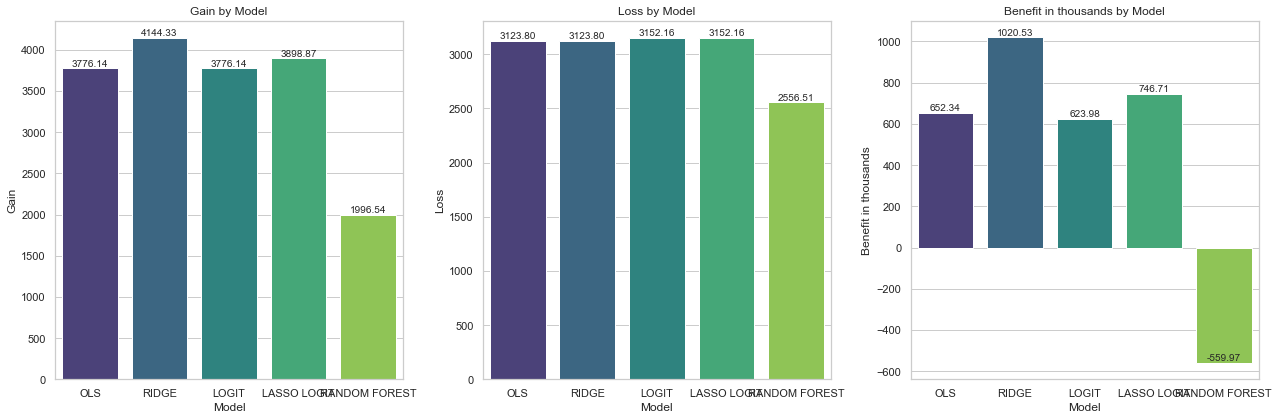

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming summary_df is already created as per your code
# If not, make sure to create it first

# Set the style for seaborn
sns.set(style="whitegrid")

# Define the metrics to plot
metrics = ['Gain', 'Loss', 'Benefit in thousands']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, metric in zip(axes, metrics):
    sns.barplot(x='Model', y=metric, data=summary_df, ax=ax, palette='viridis')
    ax.set_title(f'{metric} by Model')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    # Annotate bars with values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

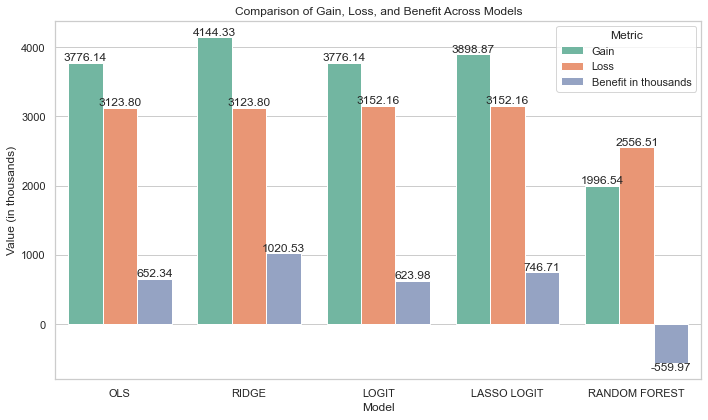

In [92]:
# Select the metrics to include in the grouped bar chart
grouped_metrics = ['Gain', 'Loss', 'Benefit in thousands']

# Melt the dataframe for seaborn
melted_df = summary_df.melt(id_vars='Model', value_vars=grouped_metrics, var_name='Metric', value_name='Value')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the grouped bar chart
sns.barplot(x='Model', y='Value', hue='Metric', data=melted_df, palette='Set2')

# Set titles and labels
plt.title('Comparison of Gain, Loss, and Benefit Across Models')
plt.ylabel('Value (in thousands)')
plt.xlabel('Model')
plt.legend(title='Metric')

# Annotate bars with values
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()